<a href="https://colab.research.google.com/github/RanielSosa/Pizzeria-Bella-Napoli/blob/main/Pizzeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime

x = datetime.datetime.now()
print(x)
fecharegistro=x.strftime("%m/%d/%Y") 
print(x.strftime("%m/%d/%Y") )

In [ ]:
import pandas as pd
df=pd.DataFrame()
df = pd.DataFrame(columns=['Tipo de Pizza', 'Ingredientes Elegidos','Base','Valor Pizza','Fecha'])
tipodepizza=input("Que tipo de Pizza quiere:\n1 - Vegetariana\n2 - No Vegetariana \nE - Para Salir\n")
resp=tipodepizza.lower()
while resp !='e':  
    if(tipodepizza=='1'):#Entro a la 121opcion de pizza vegetariana
        ingrediente=input("Seleccionar el ingrediente Vegetariano adicional:\n1 - Pimiento\n2 - Tofu\n3 - Hongos\n4 - Margarita\n")
        if(ingrediente=='1'):
          df=df.append({'Tipo de Pizza':'Vegetariana','Ingredientes Elegidos':'Pimiento','Base':5,'Valor Pizza':5,'Fecha':fecharegistro}, ignore_index=True)
        if(ingrediente=='2'):
          df=df.append({'Tipo de Pizza':'Vegetariana','Ingredientes Elegidos':'Tofu','Base':5,'Valor Pizza':8}, ignore_index=True)      
        if(ingrediente=='3'):
          df=df.append({'Tipo de Pizza':'Vegetariana','Ingredientes Elegidos':'Hongos','Base':5,'Valor Pizza':7}, ignore_index=True)
        if(ingrediente=='4'):
          df=df.append({'Tipo de Pizza':'Vegetariana','Ingredientes Elegidos':'Margarita','Base':5,'Valor Pizza':12}, ignore_index=True)  

    if(tipodepizza=='2'): #Entro a la opcion de pizza no vegetariana
        ingrediente=input("Seleccionar el ingrediente No Vegetariano adicional:\n1 - Peperoni\n2 - Jamón\n3 - Salmon\n4 - Pollo\n5 - Mexicana\n")
        if(ingrediente=='1'):
          df=df.append({'Tipo de Pizza':'No Vegetariana','Ingredientes Elegidos':'Peperoni','Base':5,'Valor Pizza':3}, ignore_index=True)
        if(ingrediente=='2'):
          df=df.append({'Tipo de Pizza':'No Vegetariana','Ingredientes Elegidos':'Jamón','Base':5,'Valor Pizza':6}, ignore_index=True)
        if(ingrediente=='3'):
          df=df.append({'Tipo de Pizza':'No Vegetariana','Ingredientes Elegidos':'Salmon','Base':5,'Valor Pizza':3}, ignore_index=True)        
        if(ingrediente=='4'):
          df=df.append({'Tipo de Pizza':'No Vegetariana','Ingredientes Elegidos':'Pollo','Base':5,'Valor Pizza':10}, ignore_index=True)        
        if(ingrediente=='5'):
          df=df.append({'Tipo de Pizza':'No Vegetariana','Ingredientes Elegidos':'Mexicana','Base':5,'Valor Pizza':12}, ignore_index=True)
          
    print("Te gustó nuestr12a pizza?\nQuieres una pizza adicional?\n-------------- Nueva Orden. --------------")
    tipodepizza=input("Que tipo de Pizza quiere:\n1 - Vegetariana\n2 - No Vegetariana \nE - Para Salir\n")
    resp=tipodepizza.lower()

print(df)

Que tipo de Pizza quiere:
1 - Vegetariana
2 - No Vegetariana 
E - Para Salir
1
Seleccionar el ingrediente Vegetariano adicional:
1 - Pimiento
2 - Tofu
3 - Hongos
4 - Margarita
1
Te gustó nuestr12a pizza?
Quieres una pizza adicional?
-------------- Nueva Orden. --------------
Que tipo de Pizza quiere:
1 - Vegetariana
2 - No Vegetariana 
E - Para Salir
e
  Tipo de Pizza Ingredientes Elegidos Base Valor Pizza       Fecha
0   Vegetariana              Pimiento    5           5  11/22/2022


In [ ]:
# Export DataFrame to csv File
df.to_csv(path_or_buf='/content/drive/MyDrive/Colab Notebooks/Docs/PizzeriaCompras.csv',index = False)

In [ ]:
import pandas as pd
ruta='/content/drive/MyDrive/Colab Notebooks/Docs/PizzeriaCompras.csv'
df=pd.read_csv(ruta)

In [ ]:
df

In [ ]:
Cantidad_Vendida=df.groupby(['Tipo de Pizza','Ingredientes Elegidos'])[['Valor Pizza']].count()
Total_Individual=df.groupby(['Tipo de Pizza','Ingredientes Elegidos'])[['Valor Pizza','Base']].sum()


##Pizzas mas vendidas

In [ ]:
sorteado=Cantidad_Vendida.sort_values("Valor Pizza", ascending=False)
sorteado

Valor Pizza
Tipo de Pizza  Ingredientes Elegidos             
No Vegetariana Jamón                           21
               Peperoni                        21
Vegetariana    Tofu                            16
No Vegetariana Salmon                          14
Vegetariana    Hongos                          13
               Margarita                        9
               Pimiento                         9
No Vegetariana Mexicana                         4
               Pollo                            4

##Total Vendido

In [ ]:
Valor_Pizza=Total_Individual['Valor Pizza'].sum()
Valor_Base=Total_Individual['Base'].sum()
Valor_Pizza+Valor_Base

1246

Base                              Valor Pizza  \
Tipo de Pizza No Vegetariana Vegetariana Total Vendido No Vegetariana   
Fecha                                                                   
11/16/2022                90          65           155             75   
11/18/2022                90          50           140            101   
11/20/2022                50          60           110             42   
11/22/2022                90          60           150            101   
Total Vendido            320         235           555            319   

                                         
Tipo de Pizza Vegetariana Total Vendido  
Fecha                                    
11/16/2022            106           181  
11/18/2022             82           183  
11/20/2022             92           134  
11/22/2022             92           193  
Total Vendido         372           691

##Graficos

para poder tener un grafico que me brinde informacion y que pueda servir para facilitar la toma de desiciones, decidí ponerle fecha a las entradas y asi poder ver en un lapso de tiempo cuales pizzas son las mas vendidas en que dias y como mejorar las ventas de las pizzas menos vendidas en esos dias que estan en bajas. 

determinando el dia de menos entrada y el tipo de pizza el dueno de la pizza podria o poner especiales los dias de menor venta para mover el inventario o reducir la compra de inventario los dias donde menos se vende una pizza en especifico.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tabla_pivot=pd.pivot_table(df,values='Valor Pizza',index=['Fecha'],columns=['Tipo de Pizza'], fill_value=0,aggfunc=np.sum,margins=True, margins_name='Total Vendido')
tabla_pivot

Tipo de Pizza,No Vegetariana,Vegetariana,Total Vendido
Fecha,,,
11/16/2022,75,106,181
11/18/2022,101,82,183
11/20/2022,42,92,134
11/22/2022,101,92,193
Total Vendido,319,372,691


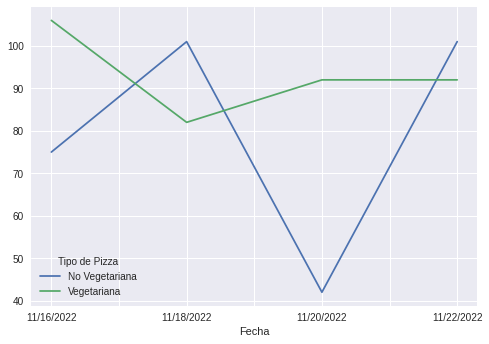

In [ ]:
tabla_pivot.plot()